In [287]:
import snscrape.modules.twitter as snstwitter
import pandas as pd
import itertools
import numpy as np

In [288]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image

In [242]:
search_query = 'KeralaFloods OR KeralaFlood OR PrayForKerala OR KeralaRains OR StandWithKerala OR OpMadad'
location = 'India' #not working, use geocode
geocode = '10.1632,76.6413,500km' # search within 1000 km radius of India's center
language = 'en'

# Stages

## Before the major impact

In [243]:
df_before = pd.DataFrame(itertools.islice(snstwitter.TwitterSearchScraper(f'{search_query} geocode:{geocode} lang:{language} since:2018-08-01 until:2018-08-15').get_items(),10000))

In [244]:
df_before.columns

Index(['url', 'date', 'rawContent', 'renderedContent', 'id', 'user',
       'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel', 'links',
       'media', 'retweetedTweet', 'quotedTweet', 'inReplyToTweetId',
       'inReplyToUser', 'mentionedUsers', 'coordinates', 'place', 'hashtags',
       'cashtags', 'card', 'viewCount', 'vibe'],
      dtype='object')

In [245]:
col_list = ['date', 'rawContent', 'user','lang','place','hashtags','likeCount','retweetCount']
df_before = df_before[col_list]

In [246]:
df_before.columns

Index(['date', 'rawContent', 'user', 'lang', 'place', 'hashtags', 'likeCount',
       'retweetCount'],
      dtype='object')

In [247]:
df_before = df_before.loc[::-1].reset_index(drop=True)
df_before

,date,rawContent,user,lang,place,hashtags,likeCount,retweetCount
0,2018-08-01 07:42:50+00:00,Opened the shutters of #Malampuzha dam #Palakk...,"{'username': 'AdvSudhinSuresh', 'id': 77953040...",en,"{'id': '09294260a5199155', 'fullName': 'Ulliye...","[Malampuzha, Palakkad, KeralaFlood]",0,0
1,2018-08-09 05:02:39+00:00,It's rising. Stay safe. #Keralarains#kalady ht...,"{'username': 'tharunova', 'id': 80231605, 'dis...",en,"{'id': '7a01d1cbca786e81', 'fullName': 'Kanaya...",None,1,0
2,2018-08-09 05:42:24+00:00,More pics from the scene. #kalady#keralaflood ...,"{'username': 'tharunova', 'id': 80231605, 'dis...",en,"{'id': '7a01d1cbca786e81', 'fullName': 'Kanaya...",None,0,0
3,2018-08-09 07:07:00+00:00,#idukki dams third shutter opened for first ti...,"{'username': 'shanksnews', 'id': 4656066013, '...",en,"{'id': '5d01806d080d1e50', 'fullName': 'Kerala...","[idukki, Kerala, periyar, aluva, KeralaFloods]",0,0
4,2018-08-09 07:26:31+00:00,Idukki dam opened after 26 years!\n#IDUKKI \n#...,"{'username': 'ChandyJongee', 'id': 10159452395...",en,"{'id': '24dab5a953e050c5', 'fullName': 'Trivan...","[IDUKKI, keralarains]",0,0
...,...,...,...,...,...,...,...,...
219,2018-08-14 17:21:59+00:00,#KeralaFloods This rain is getting scary \n\nI...,"{'username': 'jeyaajith', 'id': 72957233242824...",en,"{'id': '7a01d1cbca786e81', 'fullName': 'Kanaya...","[KeralaFloods, KeralaFloods]",0,0
220,2018-08-14 17:25:10+00:00,KINDLY CONTRIBUTE 🙏🙏🙏\n\n#KeralaFloodRelief #K...,"{'username': 'ibrktweets', 'id': 184197789, 'd...",en,"{'id': '38ac902a28ee86da', 'fullName': 'Chenna...","[KeralaFloodRelief, KeralaFloods]",1,0
221,2018-08-14 17:42:26+00:00,RT and share maximum ❤ #donate #KeralaFloods #...,"{'username': 'iamdivyakrish', 'id': 3170179592...",en,"{'id': '4ad0fa6d89777d40', 'fullName': 'Egmore...","[donate, KeralaFloods, ChennaiToKerala, Kerala...",13,10
222,2018-08-14 19:27:14+00:00,#prayforkerala Hope everything will be fine. #...,"{'username': 'albypanakalam', 'id': 75216041, ...",en,"{'id': '5f55bb82cf16ac81', 'fullName': 'Bengal...","[prayforkerala, Keralaflood, KeralaFloodRelief...",0,0


In [248]:
df_before.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   date          224 non-null    datetime64[ns, UTC]
 1   rawContent    224 non-null    object             
 2   user          224 non-null    object             
 3   lang          224 non-null    object             
 4   place         210 non-null    object             
 5   hashtags      219 non-null    object             
 6   likeCount     224 non-null    int64              
 7   retweetCount  224 non-null    int64              
dtypes: datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 14.1+ KB


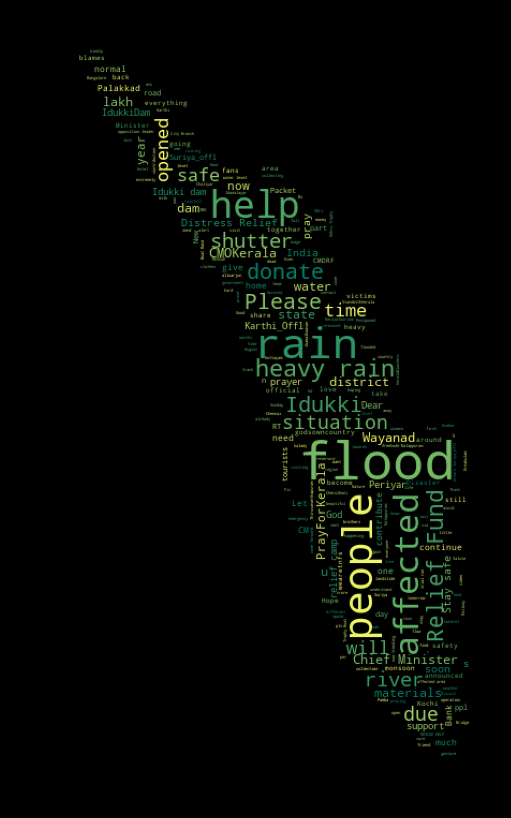

In [331]:
w = WordCloud()
stop_words = list(w.stopwords)
custom_stop_words = ['https','kerala', 'KeralaFloods','KeralaFloodRelief','t','co','KeralaRain','KeralaFlood','KeralaSos', 'KeralaRains','KeralaFloodRescue','KeralaFloods2018','floodKeralaRescue','amp']
stop_words = set(stop_words + custom_stop_words)
mask = np.array(Image.open(r'C:\Users\abhin\Desktop\Uni\VSC\KeralaFloodAnalysis\mapmask.png'))

wordcloud = WordCloud(mask = mask, background_color="black",width=1080, height=1920, stopwords=stop_words, max_words=400, max_font_size=300, colormap ='summer').generate(' '.join(df_before['rawContent'].tolist()))
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

## The most Impactful Days

In [249]:
df_during = pd.DataFrame(itertools.islice(snstwitter.TwitterSearchScraper(f'{search_query} geocode:{geocode} lang:{language} since:2018-08-15 until:2018-08-22').get_items(),10000))

In [250]:
df_during = df_during[col_list]

In [251]:
df_during = df_during.loc[::-1].reset_index(drop=True)
df_during

,date,rawContent,user,lang,place,hashtags,likeCount,retweetCount
0,2018-08-15 00:47:33+00:00,#KeralaFloods Pray to the God's for Mercy. Sto...,"{'username': 'ramanujam1951', 'id': 196958708,...",en,"{'id': '03b7ea94ef68e9d7', 'fullName': 'Mylapo...",[KeralaFloods],0,0
1,2018-08-15 01:33:55+00:00,@SnehaMKoshy @ndtv This is really a bad news c...,"{'username': 'PRAMOD_K83', 'id': 57920697, 'di...",en,"{'id': '5d01806d080d1e50', 'fullName': 'Kerala...",[KeralaFloods],0,0
2,2018-08-15 02:00:44+00:00,"Kerala flood ,live coverage @manoramanews sta...","{'username': 'deepurevathy', 'id': 239409686, ...",en,"{'id': '24dab5a953e050c5', 'fullName': 'Trivan...",[keralaflood],1,0
3,2018-08-15 02:00:47+00:00,worst forward message I have got so far for to...,"{'username': 'DavisParakal', 'id': 74994870, '...",en,"{'id': '753b065e4195d122', 'fullName': 'Cochin...","[KeralaFloods, IndependenceDay2018, today]",0,0
4,2018-08-15 02:34:00+00:00,These news readers needs maturity in reading o...,"{'username': 'j9900j', 'id': 198531611, 'displ...",en,"{'id': '7a01d1cbca786e81', 'fullName': 'Kanaya...",[KeralaFlood],0,0
...,...,...,...,...,...,...,...,...
2019,2018-08-21 20:11:57+00:00,Let's support people affected by Natural Disas...,"{'username': 'karanvir_in', 'id': 3242153910, ...",en,"{'id': '5d01806d080d1e50', 'fullName': 'Kerala...","[KeralaFloodsReliefByRMM, WorldHumanitarianDay...",1,0
2020,2018-08-21 20:18:21+00:00,We pay our final(for now) tribute2 Śrī #AtalBi...,"{'username': 'IndivarIC', 'id': 2655154129, 'd...",en,"{'id': '56981614b7203267', 'fullName': 'Kudrem...","[AtalBihariVajpayee, naturelover, AnimalRights...",2,0
2021,2018-08-21 20:58:44+00:00,2 Minutes Silence For Peoples Who Think It's a...,"{'username': 'XurajLSelvaraj', 'id': 465154768...",en,"{'id': '5d01806d080d1e50', 'fullName': 'Kerala...","[fake, Time, Traveller, Facebook, Keralafloods...",1,0
2022,2018-08-21 21:01:28+00:00,Scenes captured during flood relief work #Reb...,"{'username': 'Nishajose6', 'id': 8333826922804...",en,"{'id': '5aea3d3e01007847', 'fullName': 'Kottay...","[RebuildingKerala, StandWithKerala, floodrelief]",4,1


In [252]:
df_during.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2024 entries, 0 to 2023
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   date          2024 non-null   datetime64[ns, UTC]
 1   rawContent    2024 non-null   object             
 2   user          2024 non-null   object             
 3   lang          2024 non-null   object             
 4   place         1947 non-null   object             
 5   hashtags      2002 non-null   object             
 6   likeCount     2024 non-null   int64              
 7   retweetCount  2024 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 126.6+ KB


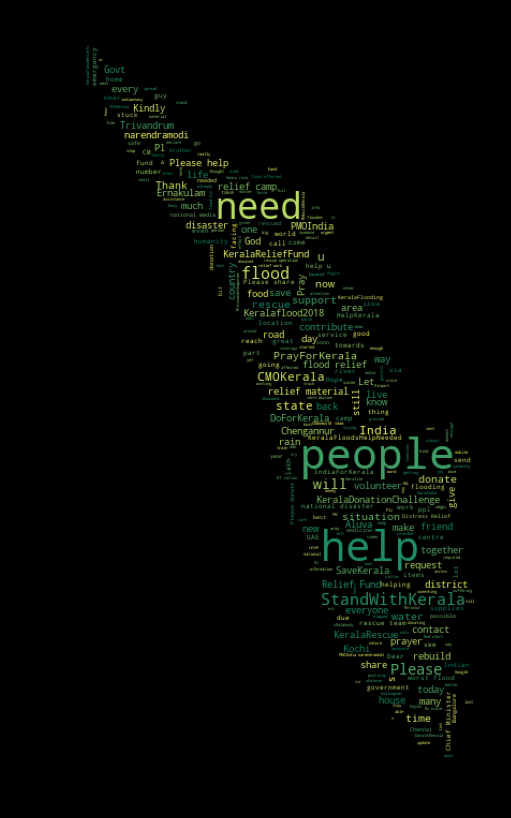

In [333]:
w = WordCloud()
stop_words = list(w.stopwords)
custom_stop_words = ['https','kerala', 'KeralaFloods','KeralaFloodRelief','t','co','KeralaRain','KeralaFlood','KeralaSos', 'KeralaRains','KeralaFloodRescue','KeralaFloods2018','floodKeralaRescue','amp']
stop_words = set(stop_words + custom_stop_words)
mask = np.array(Image.open(r'C:\Users\abhin\Desktop\Uni\VSC\KeralaFloodAnalysis\mapmask.png'))

wordcloud = WordCloud(mask = mask, background_color="black",width=1080, height=1920, stopwords=stop_words, max_words=400, max_font_size=400, colormap ='summer').generate(' '.join(df_during['rawContent'].tolist()))
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

## Aftermath

In [253]:
df_after = pd.DataFrame(itertools.islice(snstwitter.TwitterSearchScraper(f'{search_query} geocode:{geocode} lang:{language} since:2018-08-22 until:2018-08-31').get_items(),10000))

In [254]:
df_after = df_after[col_list]

In [255]:
df_after = df_after.loc[::-1].reset_index(drop=True)
df_after

,date,rawContent,user,lang,place,hashtags,likeCount,retweetCount
0,2018-08-22 00:57:28+00:00,This is #Kerala #keralafloods #keralafloodstor...,"{'username': 'nandujith', 'id': 113816305, 'di...",en,"{'id': '24dab5a953e050c5', 'fullName': 'Trivan...","[Kerala, keralafloods, keralafloodstories, hum...",0,0
1,2018-08-22 01:07:33+00:00,#KeralaFloods: Kochi international airport to ...,"{'username': 'News9Tweets', 'id': 633485882, '...",en,"{'id': '1b8680cd52a711cb', 'fullName': 'Bengal...","[KeralaFloods, Kochiairport]",0,0
2,2018-08-22 01:09:04+00:00,#KeralaFloods: Special session of Kerala assem...,"{'username': 'News9Tweets', 'id': 633485882, '...",en,"{'id': '1b8680cd52a711cb', 'fullName': 'Bengal...",[KeralaFloods],0,0
3,2018-08-22 01:41:33+00:00,Indian Army @adgpi built a 35 feet long bridge...,"{'username': 'TheKumarSangam', 'id': 971959918...",en,"{'id': '5d01806d080d1e50', 'fullName': 'Kerala...","[KeralaFloodRelief, KeralaFloods, KeralaFloods...",5,2
4,2018-08-22 02:03:53+00:00,"70 lakhs - Not about the money, but the huge h...","{'username': 'VishnuR2508', 'id': 2680075303, ...",en,"{'id': '32c33b3af9537506', 'fullName': 'Thanja...","[KeralaFloods, KeralaFloodRelief]",2,1
...,...,...,...,...,...,...,...,...
402,2018-08-30 06:51:13+00:00,2 croces from Shriram transport Finance compan...,"{'username': 'KalaiselvanJ', 'id': 357352106, ...",en,"{'id': '5a75c024c6ae075b', 'fullName': 'Uthira...",[KeralaFloods],1,0
403,2018-08-30 10:48:18+00:00,After a successful show in coimbatore we are p...,"{'username': 'theatrekaran', 'id': 83941462862...",en,"{'id': '4ad0fa6d89777d40', 'fullName': 'Egmore...","[theatrekaran, Stories, KeralaFloods, helpingo...",0,1
404,2018-08-30 12:03:01+00:00,@AAPExpress @ArvindKejriwal @SatyendarJain Tha...,"{'username': 'albypanakalam', 'id': 75216041, ...",en,"{'id': '5f55bb82cf16ac81', 'fullName': 'Bengal...","[StandwithKerala, KeralaFloods, KeralaFloodRel...",0,0
405,2018-08-30 16:08:51+00:00,"In Kerala, there’s no reason to damn the dams ...","{'username': 'Tom_Babu', 'id': 635996364, 'dis...",en,"{'id': '24dab5a953e050c5', 'fullName': 'Trivan...",[KeralaFloods],0,1


In [256]:
df_after.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   date          407 non-null    datetime64[ns, UTC]
 1   rawContent    407 non-null    object             
 2   user          407 non-null    object             
 3   lang          407 non-null    object             
 4   place         400 non-null    object             
 5   hashtags      406 non-null    object             
 6   likeCount     407 non-null    int64              
 7   retweetCount  407 non-null    int64              
dtypes: datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 25.6+ KB


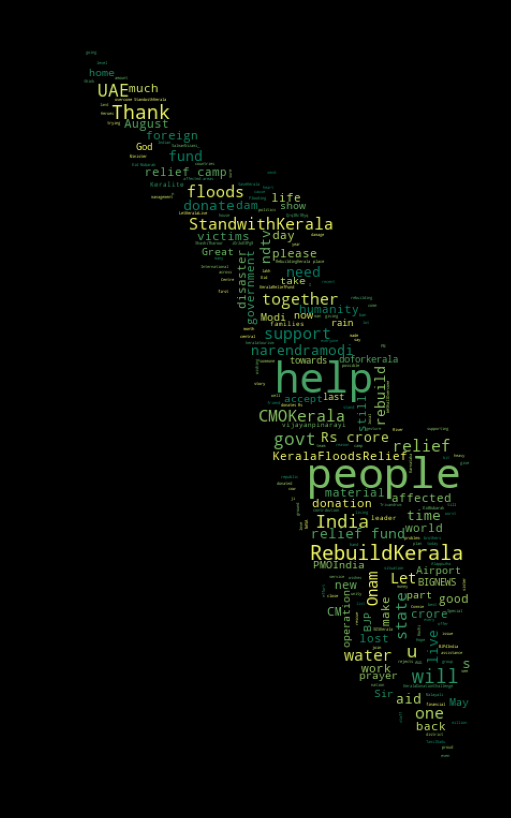

In [335]:
w = WordCloud()
stop_words = list(w.stopwords)
custom_stop_words = ['https','kerala', 'KeralaFloods','KeralaFloodRelief','t','co','KeralaRain','KeralaFlood','KeralaSos', 'KeralaRains','KeralaFloodRescue','KeralaFloods2018','floodKeralaRescue','amp','flood']
stop_words = set(stop_words + custom_stop_words)
mask = np.array(Image.open(r'C:\Users\abhin\Desktop\Uni\VSC\KeralaFloodAnalysis\mapmask.png'))

wordcloud = WordCloud(mask = mask, background_color="black",width=1080, height=1920, stopwords=stop_words, max_words=400, max_font_size=300, colormap ='summer').generate(' '.join(df_after['rawContent'].tolist()))
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

In [260]:
tweets_df = pd.concat([df_before,df_during,df_after]).reset_index(drop=True)
tweets_df

,date,rawContent,user,lang,place,hashtags,likeCount,retweetCount
0,2018-08-01 07:42:50+00:00,Opened the shutters of #Malampuzha dam #Palakk...,"{'username': 'AdvSudhinSuresh', 'id': 77953040...",en,"{'id': '09294260a5199155', 'fullName': 'Ulliye...","[Malampuzha, Palakkad, KeralaFlood]",0,0
1,2018-08-09 05:02:39+00:00,It's rising. Stay safe. #Keralarains#kalady ht...,"{'username': 'tharunova', 'id': 80231605, 'dis...",en,"{'id': '7a01d1cbca786e81', 'fullName': 'Kanaya...",None,1,0
2,2018-08-09 05:42:24+00:00,More pics from the scene. #kalady#keralaflood ...,"{'username': 'tharunova', 'id': 80231605, 'dis...",en,"{'id': '7a01d1cbca786e81', 'fullName': 'Kanaya...",None,0,0
3,2018-08-09 07:07:00+00:00,#idukki dams third shutter opened for first ti...,"{'username': 'shanksnews', 'id': 4656066013, '...",en,"{'id': '5d01806d080d1e50', 'fullName': 'Kerala...","[idukki, Kerala, periyar, aluva, KeralaFloods]",0,0
4,2018-08-09 07:26:31+00:00,Idukki dam opened after 26 years!\n#IDUKKI \n#...,"{'username': 'ChandyJongee', 'id': 10159452395...",en,"{'id': '24dab5a953e050c5', 'fullName': 'Trivan...","[IDUKKI, keralarains]",0,0
...,...,...,...,...,...,...,...,...
2650,2018-08-30 06:51:13+00:00,2 croces from Shriram transport Finance compan...,"{'username': 'KalaiselvanJ', 'id': 357352106, ...",en,"{'id': '5a75c024c6ae075b', 'fullName': 'Uthira...",[KeralaFloods],1,0
2651,2018-08-30 10:48:18+00:00,After a successful show in coimbatore we are p...,"{'username': 'theatrekaran', 'id': 83941462862...",en,"{'id': '4ad0fa6d89777d40', 'fullName': 'Egmore...","[theatrekaran, Stories, KeralaFloods, helpingo...",0,1
2652,2018-08-30 12:03:01+00:00,@AAPExpress @ArvindKejriwal @SatyendarJain Tha...,"{'username': 'albypanakalam', 'id': 75216041, ...",en,"{'id': '5f55bb82cf16ac81', 'fullName': 'Bengal...","[StandwithKerala, KeralaFloods, KeralaFloodRel...",0,0
2653,2018-08-30 16:08:51+00:00,"In Kerala, there’s no reason to damn the dams ...","{'username': 'Tom_Babu', 'id': 635996364, 'dis...",en,"{'id': '24dab5a953e050c5', 'fullName': 'Trivan...",[KeralaFloods],0,1


In [262]:
tweets_df.sort_values(by ='retweetCount', ascending=False)

,date,rawContent,user,lang,place,hashtags,likeCount,retweetCount
1411,2018-08-18 12:22:37+00:00,#Xiaomi is supplying thousands of fully charge...,"{'username': 'manukumarjain', 'id': 74787719, ...",en,"{'id': '123ad1f35e190c93', 'fullName': 'Anekal...","[Xiaomi, Kerala, XiaomiWithKerala, KeralaFloods]",5384,1360
172,2018-08-12 16:57:34+00:00,Humanity is still alive.. #KeralaFloods https:...,"{'username': 'rameshlaus', 'id': 102268884, 'd...",en,"{'id': '03b7ea94ef68e9d7', 'fullName': 'Mylapo...",[KeralaFloods],4116,745
2076,2018-08-20 15:21:31+00:00,• #AllIndiaSFC 's #Flood Relief Essential mate...,"{'username': 'SuriyaFansClub', 'id': 306046362...",en,"{'id': '6d86f195adaa42fb', 'fullName': 'Saidap...","[AllIndiaSFC, Flood, KeralaFloodRelief, Kerala...",3484,718
119,2018-08-11 10:20:55+00:00,Actors @Suriya_offl and @Karthi_Offl donate 25...,"{'username': 'rameshlaus', 'id': 102268884, 'd...",en,"{'id': '38ac902a28ee86da', 'fullName': 'Chenna...","[Kerala, KeralaFloods]",2251,526
2377,2018-08-23 08:41:05+00:00,#Kerala: we are supporting all #Xiaomi mobile ...,"{'username': 'manukumarjain', 'id': 74787719, ...",en,"{'id': '5f55bb82cf16ac81', 'fullName': 'Bengal...","[Kerala, Xiaomi, KeralaFloods, XiaomiWithKerala]",2486,504
...,...,...,...,...,...,...,...,...
1149,2018-08-18 03:13:52+00:00,#respect #uae #standwithkerala #kerala #floods...,"{'username': 'nandujith', 'id': 113816305, 'di...",en,"{'id': '24dab5a953e050c5', 'fullName': 'Trivan...","[respect, uae, standwithkerala, kerala, floods...",0,0
1148,2018-08-18 03:11:53+00:00,#KeralaFloods 1000s of people stranded in Kera...,"{'username': 'VishalKoshy555', 'id': 88629199,...",en,"{'id': '5d01806d080d1e50', 'fullName': 'Kerala...","[KeralaFloods, IndianArmy, SaveKerala]",0,0
1147,2018-08-18 03:11:23+00:00,#HelpKerala #KeralaFlood #KeralaDonationChalle...,"{'username': 'krishnaker', 'id': 47074597, 'di...",en,"{'id': '5d01806d080d1e50', 'fullName': 'Kerala...","[HelpKerala, KeralaFlood, KeralaDonationChalle...",0,0
1145,2018-08-18 03:02:57+00:00,@Cristiano @nikefootball I only want to tell y...,"{'username': 'salman007__', 'id': 908818638303...",en,"{'id': '3d8197e37c52c3aa', 'fullName': 'Kannur...",[StandWithKerala],3,0


In [258]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2655 entries, 0 to 406
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   date          2655 non-null   datetime64[ns, UTC]
 1   rawContent    2655 non-null   object             
 2   user          2655 non-null   object             
 3   lang          2655 non-null   object             
 4   place         2557 non-null   object             
 5   hashtags      2627 non-null   object             
 6   likeCount     2655 non-null   int64              
 7   retweetCount  2655 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 186.7+ KB


In [269]:
excel_df = tweets_df
excel_df['date'] = excel_df['date'].dt.tz_localize(None)
excel_df.to_excel("tweets_excel.xlsx")

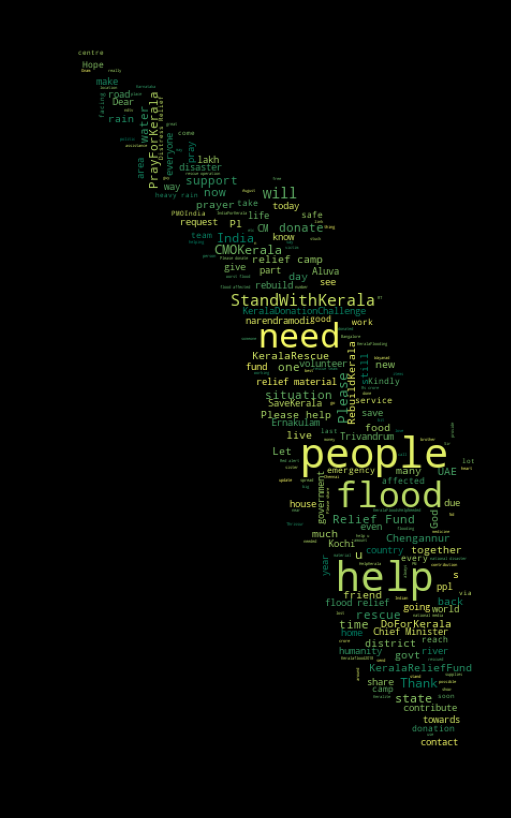

In [336]:
w = WordCloud()
stop_words = list(w.stopwords)
custom_stop_words = ['https','kerala', 'KeralaFloods','KeralaFloodRelief','t','co','KeralaRain','KeralaFlood','KeralaSos', 'KeralaRains','KeralaFloodRescue','KeralaFloods2018','floodKeralaRescue','amp']
stop_words = set(stop_words + custom_stop_words)
mask = np.array(Image.open(r'C:\Users\abhin\Desktop\Uni\VSC\KeralaFloodAnalysis\mapmask.png'))

wordcloud = WordCloud(mask = mask, background_color="black",width=1080, height=1920, stopwords=stop_words, max_words=400, max_font_size=300, colormap ='summer').generate(' '.join(tweets_df['rawContent'].tolist()))
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)